# Part one of Independent Project completed for LaunchCode's CoderGirl program for the Data Science track.

## This portion of the project entails performing exploratory data analysis on data from [UCI's Heart Disease dataset](https://www.kaggle.com/ronitf/heart-disease-uci/version/1#). The intention of this project is to build a model (in part two) that can predict heart disease.

## --

## I. Importing the Data and Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

custom = sns.xkcd_palette(colors= ['sage green', 'coral', 'bluegrey', 'charcoal'])
char_sage = sns.xkcd_palette(colors=['charcoal', 'sage green'])
char_coral = sns.xkcd_palette(colors=['charcoal', 'coral'])
char_blue = sns.xkcd_palette(colors=['charcoal', 'bluegrey'])
blue_sage = sns.xkcd_palette(colors=['greyblue', 'sage green'])

sns.set_style("dark")

In [2]:
heart = pd.read_csv('heart.csv')
y = heart.target
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The attribute information, available on the Kaggle page for the dataset, is as follows:
> 1. age
> 2. sex (1=male, 0=female)
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl (1=true, 0=false)
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by fluoroscopy
> 13. thal: 3 = minor; 6 = intermediate; 7 = major

The 'target' attribute is either 1 (heart disease) or 0 (no heart disease).

In [3]:
heart.columns = ['age', 'sex', 'pain_type', 'restingBP', 'chol', 'fasting_sugar', 'resting_ecg', 'maxHR', 'exercise_angina', 'ST_depression', 'ST_peak_slope', 'vessels_fluoro', 'thal_severity', 'heart_disease']
heart.head()

,age,sex,pain_type,restingBP,chol,fasting_sugar,resting_ecg,maxHR,exercise_angina,ST_depression,ST_peak_slope,vessels_fluoro,thal_severity,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


I cleaned up the dataframe column titles to make more sense to me and be easier to read.
Some concepts required some more information than what was provided:
> 3. Chest pain type: 1=anginal, 2=atypical, 3=non-anginal, 4=asymptomatic
> 7. Resting ECG results: 0=probable or definite left ventricular hypterophy, 1=normal, 2=having ST-wave abnormality
> 11. ST peak during exercise: 0=downsloping, 1=flat, 2=upsloping
> 10. ST depression refers to the deviation of the ST segment, recorded by an ECG, which is abnormally low.
> 13. 'Thal' is short for Thalassemia (I believe), which is an inherited blood disorder that causes one's blood to have lower hemoglobin than normal, thus carrying less oxygen. It can have varying degrees of severity (see above).

# II. Cleaning the Data

In [4]:
heart.describe()

,age,sex,pain_type,restingBP,chol,fasting_sugar,resting_ecg,maxHR,exercise_angina,ST_depression,ST_peak_slope,vessels_fluoro,thal_severity,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Before I continue with any data cleaning, I want to make sure I'm not missing any values or have any other basic data issues:
* I can see from the counts of each feature that no values are missing.
* I can also see from a brief look over the columns that there are somewhat significant outliers in the "chol" and "STdep" columns.
* It is hard to tell if any duplicates exist from the description of the data, so I will have to do a check for those.

In [5]:
# Check for outliers
restingBP_outliers = heart[heart['restingBP'] > heart['restingBP'].mean() + 3 * heart['restingBP'].std()]
chol_outliers = heart[heart['chol'] > heart['chol'].mean() + 3 * heart['chol'].std()]
ST_depression_outliers = heart[heart['ST_depression'] > heart['ST_depression'].mean() + 3 * heart['ST_depression'].std()]
print(" RestingBP Outliers: ", restingBP_outliers.index.tolist(), "\n",
     "Chol Outliers: ", chol_outliers.index.tolist(), "\n",
      "ST_depression_outliers: ", ST_depression_outliers.index.tolist())

 RestingBP Outliers:  [223, 248] 
 Chol Outliers:  [28, 85, 220, 246] 
 ST_depression_outliers:  [204, 221]


In [6]:
# Drop outliers
heart.drop([223, 248, 28, 85, 220, 246, 204, 221], inplace=True)

In [7]:
# Check for duplicates
heart[heart.duplicated(keep=False)]

,age,sex,pain_type,restingBP,chol,fasting_sugar,resting_ecg,maxHR,exercise_angina,ST_depression,ST_peak_slope,vessels_fluoro,thal_severity,heart_disease
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
# Drop the duplicates found
heart = heart.drop_duplicates()

In [9]:
heart.describe()

,age,sex,pain_type,restingBP,chol,fasting_sugar,resting_ecg,maxHR,exercise_angina,ST_depression,ST_peak_slope,vessels_fluoro,thal_severity,heart_disease
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,54.275510,0.693878,0.972789,130.996599,243.857143,0.146259,0.537415,149.540816,0.326531,0.989456,1.411565,0.697279,2.299320,0.551020
std,9.093501,0.461667,1.034857,16.815501,45.679474,0.353968,0.526073,22.915858,0.469743,1.074300,0.604874,0.994967,0.611773,0.498238
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.500000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,394.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


I chose to drop any outliers because I want to ensure the reliability of my model.

I also chose to drop the duplicate row of data, so as to prevent any level of bias that data point may have added to the results.

## III. Visualizing the Relationships of the Features to the Target Data

### Correlation Plot of Continuous Features by Heart Disease

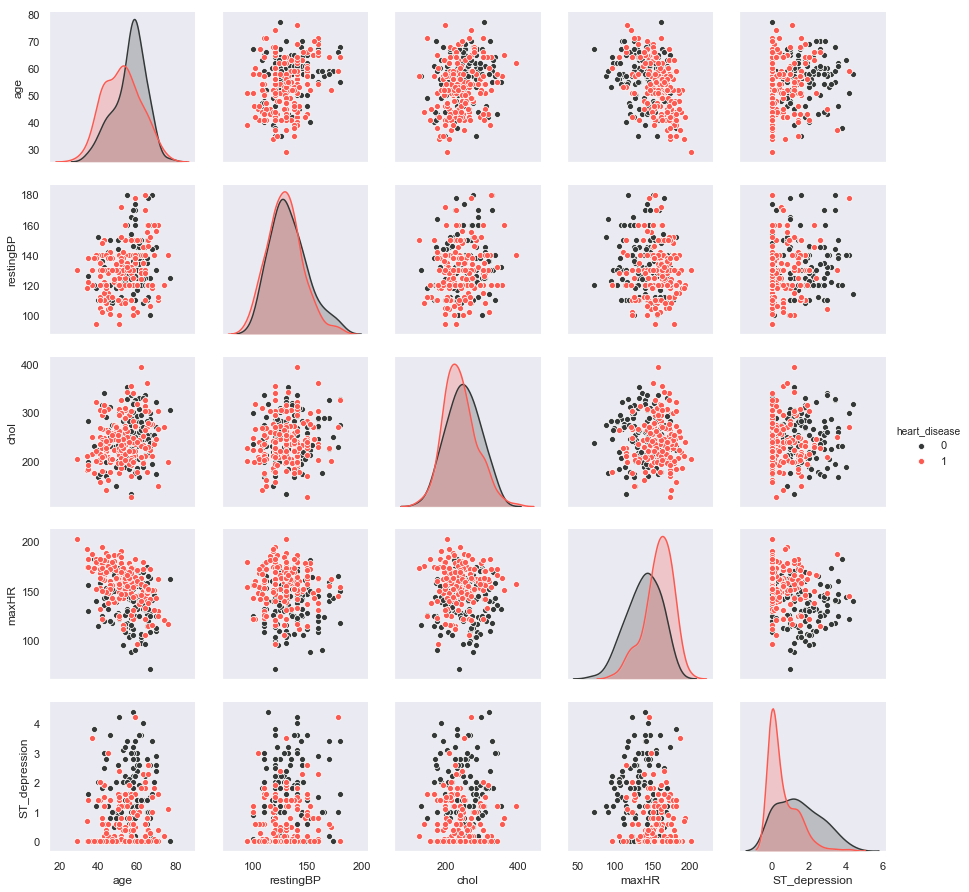

In [10]:
# Plot with only continuous data
a = sns.pairplot(heart, vars=['age', 'restingBP', 'chol', 'maxHR', 'ST_depression'], palette=char_coral, hue='heart_disease')

plt.rcParams['figure.figsize'] = (20, 20)

Text(0.5, 1.0, 'Heatmap of Correlations')

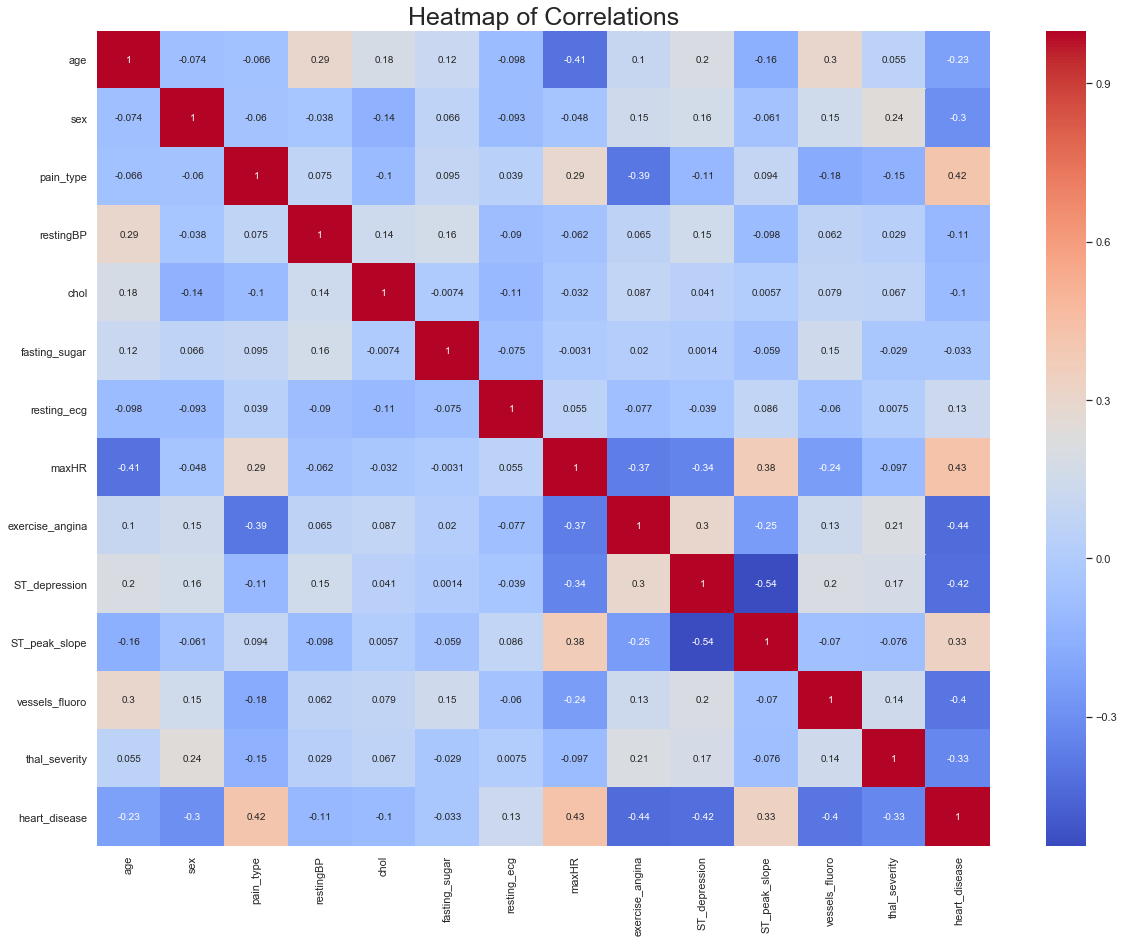

In [11]:
# Correlation Heatmap
corr = heart.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', ax=ax, annot=True)
ax.set_title("Heatmap of Correlations", size=25)

Since I am able to spot several moderate correlations from the heatmap between the target feature and others, I will focus the remainder of my analysis on the following features and their relationship to the target:
* Pain Type (pain_type)
* Maximum Heart Rate Achieved (maxHR)
* Exercise-Induced Angina (exercise_angina)
* ST Segment Depression (ST_depression)
* Majors Vessels Colored by Fluoroscopy (vessels_fluoro)

I will also include distributions of age and sex in this dataset for a visual overview of the sample population.

### Distributions of Age and Sex

([<matplotlib.axis.XTick at 0x1eb7ea41710>,
 <a list of 2 Text xticklabel objects>)

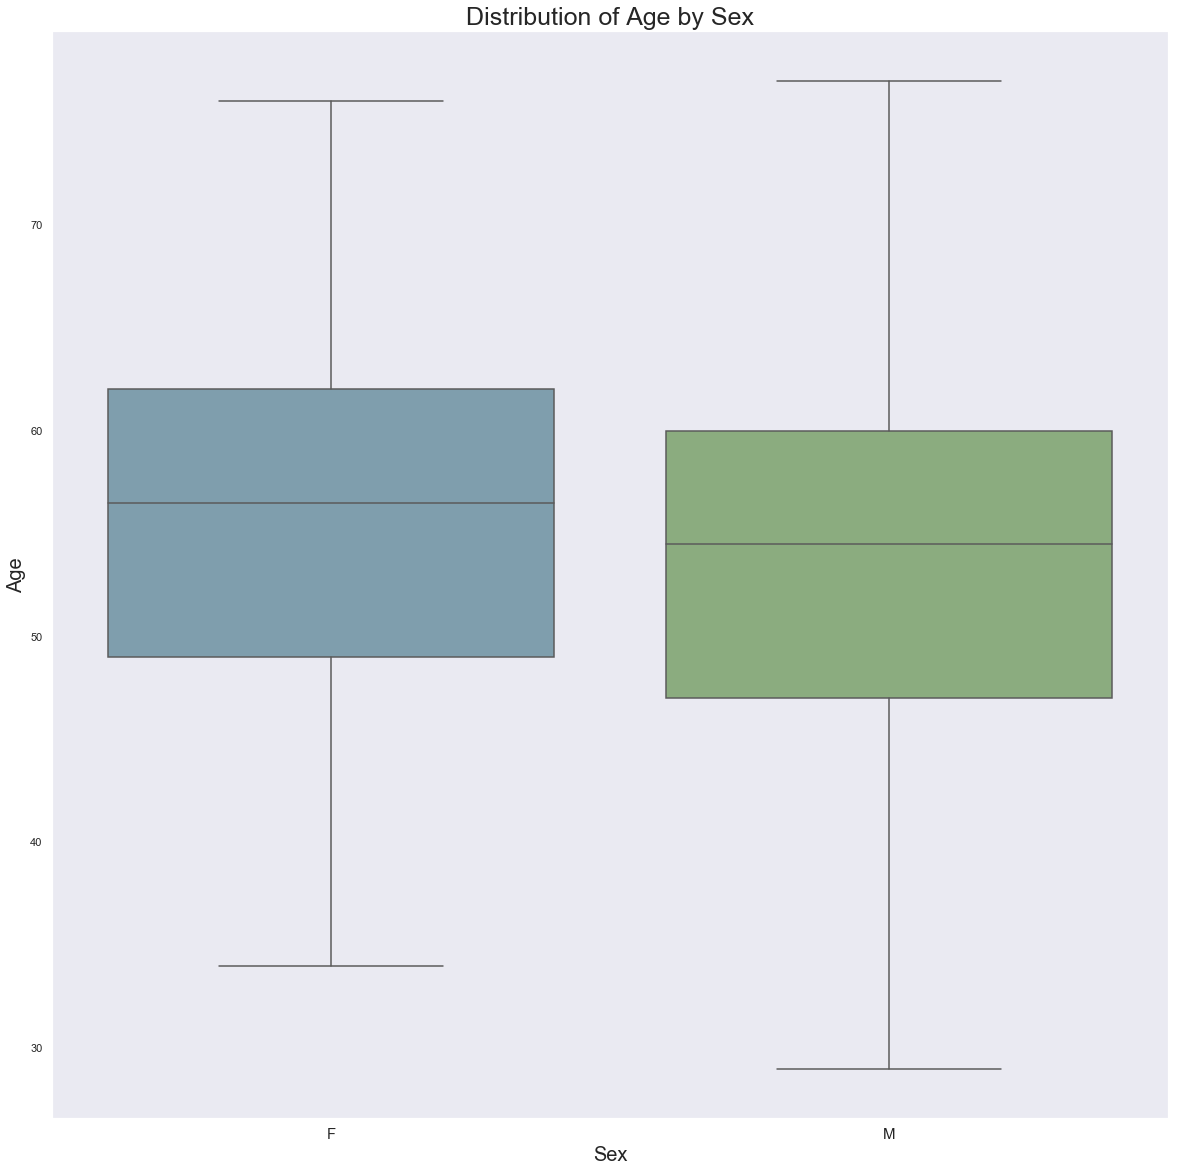

In [12]:
sns.boxplot(x='sex', y='age', data=heart, palette=blue_sage)

plt.rcParams['figure.figsize'] = (10, 10)
plt.xlabel('Sex', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.title('Distribution of Age by Sex', fontsize=25)
plt.xticks([0, 1], ['F', 'M'], fontsize=15)

([<matplotlib.axis.XTick at 0x1eb7ea854a8>,
 <a list of 2 Text xticklabel objects>)

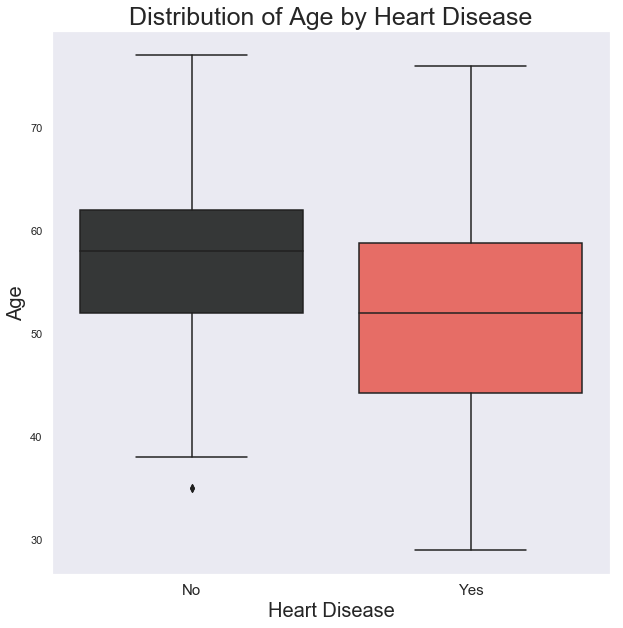

In [13]:
sns.boxplot(x='heart_disease', y='age', data=heart, palette=char_coral)

plt.rcParams['figure.figsize'] = (10, 10)
plt.xlabel('Heart Disease', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.title('Distribution of Age by Heart Disease', fontsize=25)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=15)

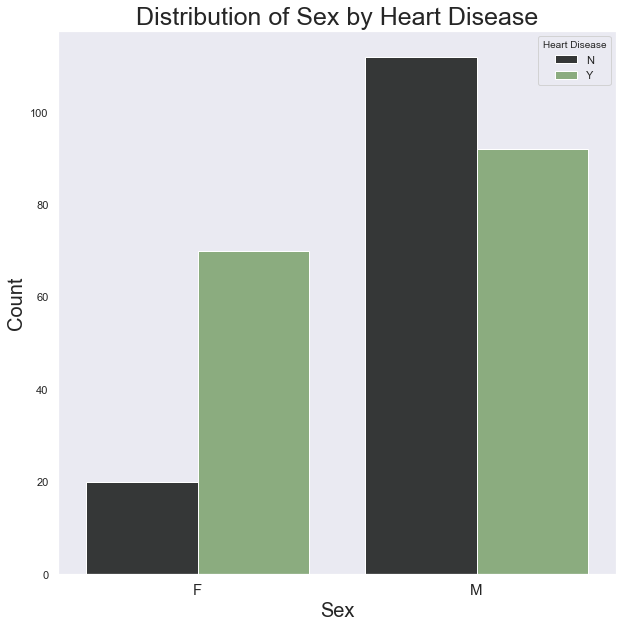

In [14]:
a = sns.countplot('sex', data=heart, hue='heart_disease', palette=char_sage)

plt.rcParams['figure.figsize'] = (10, 10)
plt.xlabel('Sex', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Distribution of Sex by Heart Disease', fontsize=25)
plt.xticks([0, 1], ['F', 'M'], fontsize=15)
a.legend('N'+'Y', title='Heart Disease')

### Heart Disease by Pain Type

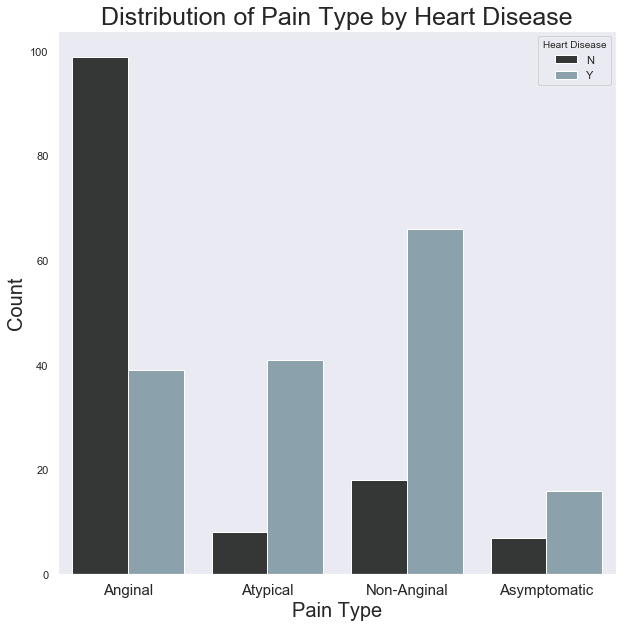

In [15]:
a = sns.countplot(x='pain_type', hue='heart_disease', data=heart, palette=char_blue)

plt.rcParams['figure.figsize'] = (10, 10)
plt.xlabel('Pain Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Distribution of Pain Type by Heart Disease', fontsize=25)
plt.xticks([0, 1, 2, 3], ['Anginal', 'Atypical', 'Non-Anginal', 'Asymptomatic'], fontsize=15)
a.legend('N'+'Y', title='Heart Disease')

### Heart Disease by Maximum Heart Rate Achieved

([<matplotlib.axis.XTick at 0x1eb7f45f828>,
 <a list of 2 Text xticklabel objects>)

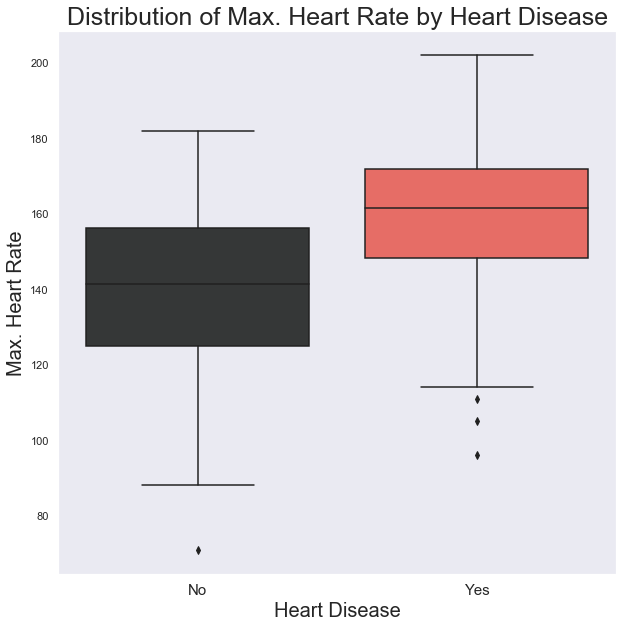

In [16]:
sns.boxplot(x='heart_disease', y='maxHR', data=heart, palette=char_coral)

plt.rcParams['figure.figsize'] = (10, 10)
plt.xlabel('Heart Disease', fontsize=20)
plt.ylabel('Max. Heart Rate', fontsize=20)
plt.title('Distribution of Max. Heart Rate by Heart Disease', fontsize=25)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=15)

### Heart Disease by Presence of Exercise Induced Angina

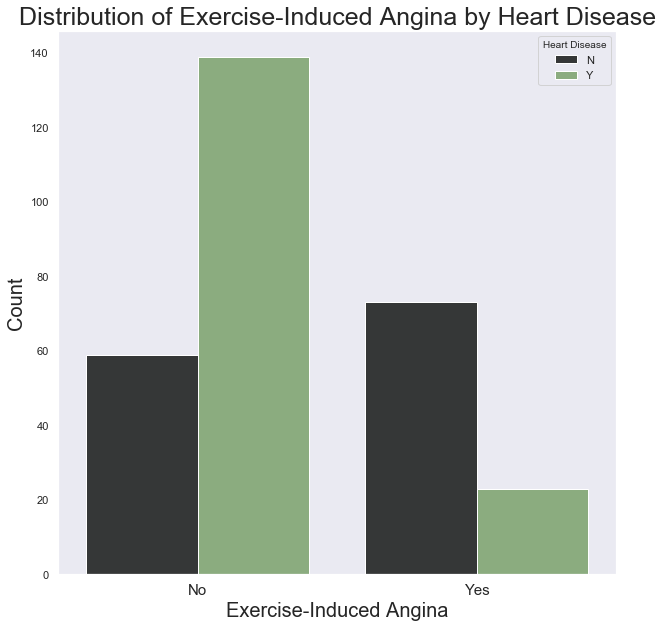

In [17]:
a = sns.countplot('exercise_angina', hue='heart_disease', palette=sns.color_palette(char_sage), data=heart)

plt.rcParams['figure.figsize'] = (10, 10)
plt.xlabel('Exercise-Induced Angina', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Distribution of Exercise-Induced Angina by Heart Disease', fontsize=25)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=15)
a.legend("N"+"Y", title="Heart Disease")

### Heart Disease by Depression of the ST Curve

In [18]:
heart['ST_depression_bins'] = heart['ST_depression'].apply(lambda x: 0 if x < 1
                                        else 1 if x < 2
                                        else 2 if x < 3
                                        else 3 if x < 4
                                        else 4)

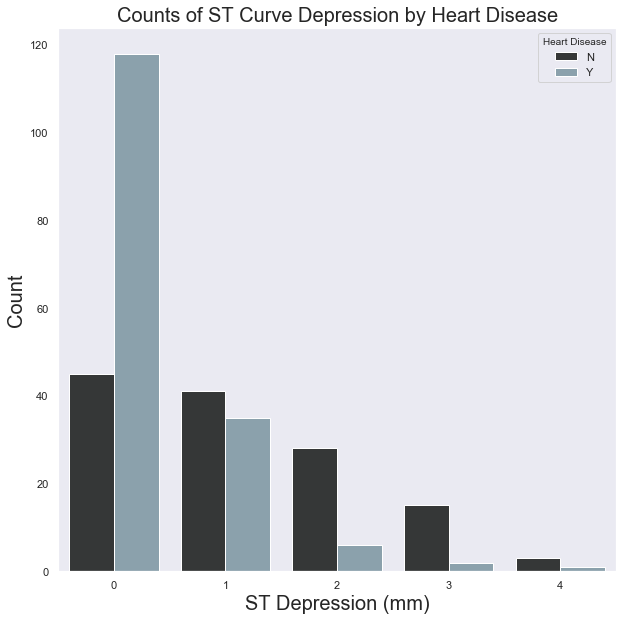

In [19]:
a = sns.countplot('ST_depression_bins', hue='heart_disease', palette=char_blue, data=heart)

plt.rcParams['figure.figsize'] = (10, 10)
plt.xlabel('ST Depression (mm)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Counts of ST Curve Depression by Heart Disease', size=20)
a.legend('N'+'Y', title='Heart Disease')

### Heart Disease by Number of Major Vessels Colored by Fluoroscopy

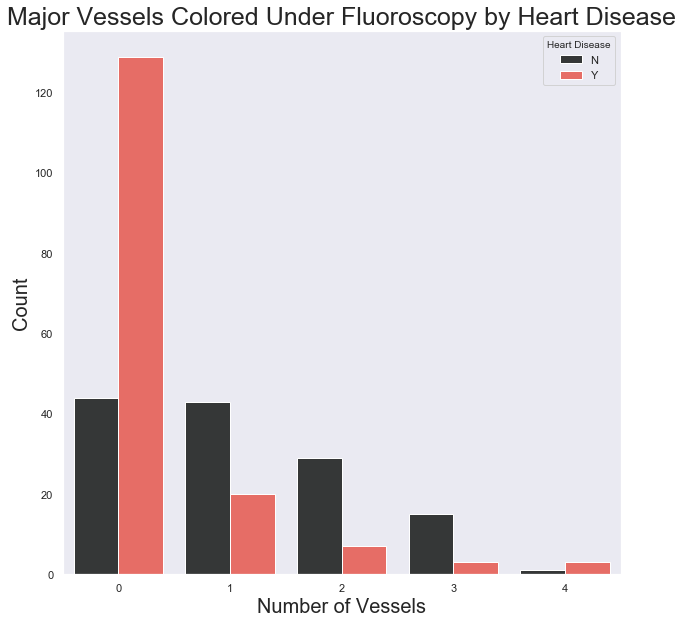

In [20]:
a = sns.countplot('vessels_fluoro', hue='heart_disease', palette=char_coral, data=heart)

plt.rcParams['figure.figsize'] = (10, 10)
plt.xlabel('Number of Vessels', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Major Vessels Colored Under Fluoroscopy by Heart Disease', fontsize=25)
a.legend('N'+'Y', title='Heart Disease')

## IV. Conclusion

Based on the exploration of the previous five features, I can see some strong correlations with the target feature and have the information I need to move forward into the modeling stage.

In [37]:
heart.to_csv('heart_new')